# Python for Data Science: Final Project

In this project, an open dataset from the site <a href="https://www.kaggle.com/wosaku/crime-in-vancouver">Crime in Vancouver</a> is being used.

## Exploratory data analysis

Preliminary explore the records (rows) and fields (columns)

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter

import folium
from folium import Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [2]:
data_raw = pd.read_csv('./final_project_data/1929_6405_bundle_archive/crime.csv')
print(data_raw.shape)

data = data_raw.dropna()
print(len(data))

data.head(2)

(530652, 12)
474015


,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763


In [3]:
# all type of crimes
print(len(data.TYPE.unique()))
Counter(data.TYPE)

9


Counter({'Other Theft': 52160,
         'Break and Enter Residential/Other': 60856,
         'Mischief': 70157,
         'Break and Enter Commercial': 33841,
         'Theft from Vehicle': 170889,
         'Vehicle Collision or Pedestrian Struck (with Injury)': 21887,
         'Vehicle Collision or Pedestrian Struck (with Fatality)': 254,
         'Theft of Vehicle': 38351,
         'Theft of Bicycle': 25620})

In [4]:
# number of records containing vehicle collision and pedestrian struck
data[data.TYPE.str.contains('Vehicle Collision or Pedestrian Struck')].shape

(22141, 12)

In [5]:
# all neighbourhoods
print(len(data.NEIGHBOURHOOD.unique()))
Counter(data.NEIGHBOURHOOD)

24


Counter({'Strathcona': 20917,
         'Kerrisdale': 7447,
         'Dunbar-Southlands': 7746,
         'Grandview-Woodland': 27180,
         'Sunset': 17395,
         'West End': 41352,
         'Central Business District': 110945,
         'Hastings-Sunrise': 18126,
         'Victoria-Fraserview': 10818,
         'Fairview': 32161,
         'Kensington-Cedar Cottage': 24941,
         'West Point Grey': 5870,
         'Shaughnessy': 5426,
         'Renfrew-Collingwood': 26761,
         'Killarney': 10475,
         'Riley Park': 12520,
         'Arbutus Ridge': 6066,
         'Musqueam': 532,
         'Mount Pleasant': 30534,
         'Kitsilano': 26698,
         'Stanley Park': 3775,
         'South Cambie': 5212,
         'Marpole': 13083,
         'Oakridge': 8035})

In [6]:
# unique street block of all crime incidents
len(data.HUNDRED_BLOCK.unique())

21192

In [7]:
# unique street block of vehicle collision and pedestrian struck
len(data[data.TYPE.str.contains('Vehicle Collision or Pedestrian Struck')].HUNDRED_BLOCK.unique())

7411

Explore patterns of vehicle collision and pedestrian struck relative to year, month, day, hour

/home/ornwipa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


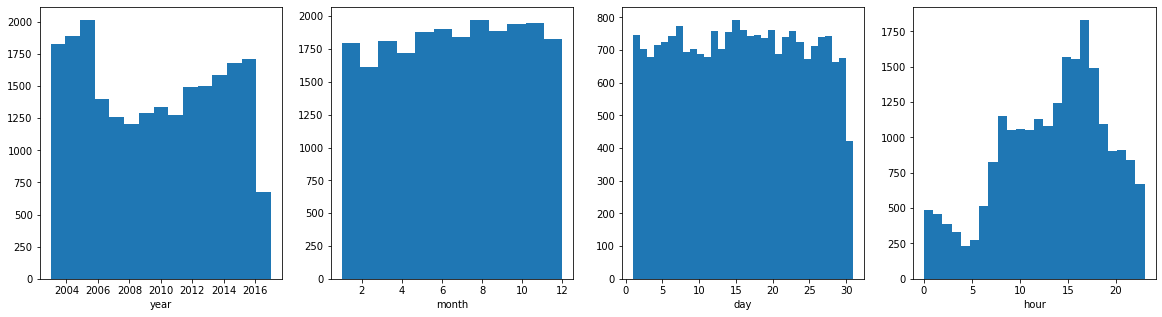

In [14]:
data = data[data.TYPE.str.contains('Vehicle Collision or Pedestrian Struck')]

fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 5))

axes[0].hist(data.YEAR, bins = 15)
axes[0].set_xlabel('year')

axes[1].hist(data.MONTH, bins = 12)
axes[1].set_xlabel('month')

axes[2].hist(data.DAY, bins = 31)
axes[2].set_xlabel('day')

axes[3].hist(data.HOUR, bins = 24)
axes[3].set_xlabel('hour')

fig.show()

<class 'collections.Counter'>
dict_keys(['Mount Pleasant', 'Kitsilano', 'Stanley Park', 'Hastings-Sunrise', 'Central Business District', 'Grandview-Woodland', 'Fairview', 'Kensington-Cedar Cottage', 'Shaughnessy', 'South Cambie', 'Dunbar-Southlands', 'Marpole', 'West End', 'West Point Grey', 'Oakridge', 'Kerrisdale', 'Arbutus Ridge', 'Victoria-Fraserview', 'Renfrew-Collingwood', 'Killarney', 'Strathcona', 'Musqueam', 'Sunset', 'Riley Park'])
dict_values([1642, 1053, 223, 1288, 3229, 1249, 1194, 1555, 586, 239, 272, 941, 1190, 309, 420, 450, 288, 796, 1413, 582, 1174, 60, 1313, 675])


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 <a list of 24 Text xticklabel objects>)

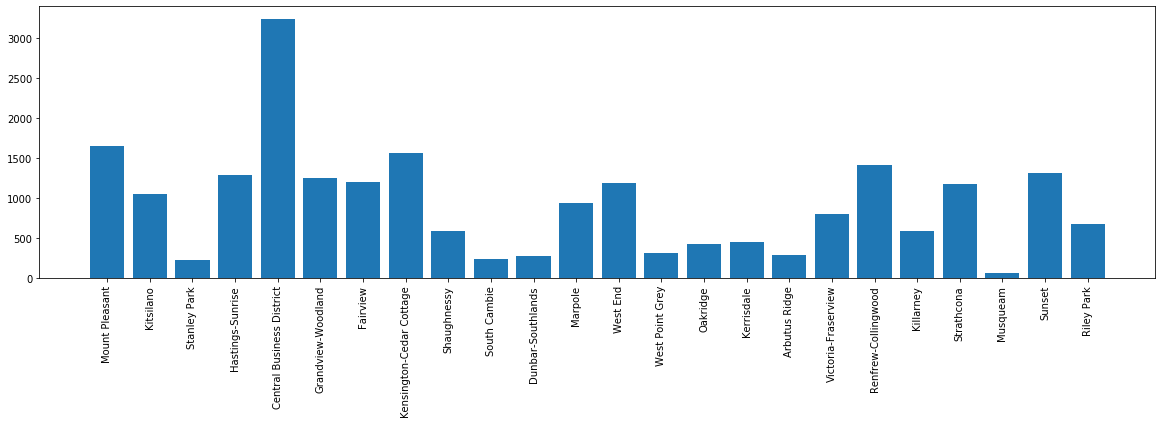

In [34]:
print(type(Counter(data.NEIGHBOURHOOD)))
print(Counter(data.NEIGHBOURHOOD).keys())
print(Counter(data.NEIGHBOURHOOD).values())

plt.figure(figsize = (20,5))
plt.bar(Counter(data.NEIGHBOURHOOD).keys(), Counter(data.NEIGHBOURHOOD).values())
plt.xticks(rotation = 90)

In [35]:
# focus on the hour from 6 am to 11 pm, every day, month, year and street
data = data[data.HOUR.isin(range(6,13))]
data.shape

(6787, 12)

## Create interactive maps

The original data set contains coordinates in UTM Zone 10 (columns X and Y) as well as the Latitude and Longitude.

The maps represent only the latest full year (2016) for simplicity.


In [36]:
print(len(data[data.YEAR == 2016]))

m_2 = folium.Map(location = [49.255707, -123.135152], tiles = 'cartodbpositron', zoom_start = 12)

for idx, row in data[data.YEAR == 2017].iterrows():
    Marker([row['Latitude'], row['Longitude']]).add_to(m_2)
    
m_2

511


In [37]:
m_3 = folium.Map(location = [49.255707, -123.135152], tiles = 'stamenterrain', zoom_start = 12)

mc = MarkerCluster()
for idx, row in data[data.YEAR == 2016].iterrows():
    if not math.isnan(row['Latitude']) and not math.isnan(row['Longitude']):
        mc.add_child(Marker([row['Latitude'], row['Longitude']]))
m_3.add_child(mc)

m_3

In [38]:
m_5 = folium.Map(location = [49.255707, -123.135152], tiles = 'openstreetmap', zoom_start = 12)

HeatMap(data = data[data.YEAR == 2016][['Latitude', 'Longitude']], radius=10).add_to(m_5)

m_5

## K-means clustering 

### Scale latitude and longitude features

In [ ]:
# use this code later for k-means clustering

m_4 = folium.Map(location = [49.255707, -123.135152], tiles = 'stamentoner', zoom_start = 12)

def color_producer(val):
    if (val < 14) or (val > 20): # not during rush hour
        return 'indigo'
    else:
        return 'darkred' 

for i in range(0, len(clustered_data) ):
    Circle(location = [ clustered_data.iloc[i]['Latitude'], clustered_data.iloc[i]['Longitude'] ], radius = 20,
        color = color_producer(clustered_data.iloc[i]['CLUSTER'])).add_to(m_4)

m_4